- Bert(Bidrectional Encoder Representations from Transformers)  
  - 트랜스포머 인코더를 쌓아올린구조(Stacked)
    - 사용한 인코더의 개수와 어텐션헤드의 수에따라서 세부모델이 분류
  - 특징
    - Bidirectional : RNN 계열은 순차처리를 하나 트랜스포머 매커니즘을 이용해서 양방향에서 텍스트를 동시에 처리해서 더 강력한 문맥을 이해
    - Maksed Language Model : 문장내 일부 단어를 임의로 마스킹해서 예측하는 방향으로 학습
    - Next Sentence Prediction : 문장간의 관계도 학습
    - Fine_tuning :  미세조정이 가능 다양한 NLP 작업에 적합

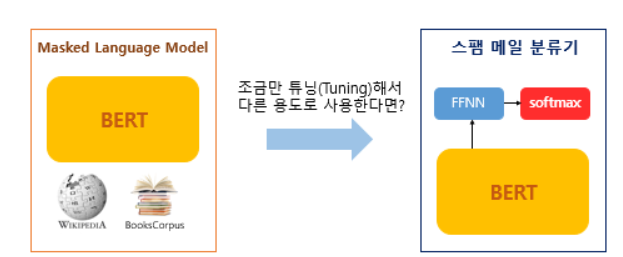

In [1]:
# 버트토크나이져 -> Hugging Face의 transformers 라이브러

In [2]:
!pip install transformers

In [3]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased',cashe_dir='bert_ckpt',do_lower_case=False)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [4]:
test_senctence = '안녕하세요, 반갑습니다.'
encode = tokenizer.encode(test_senctence) # 시작토큰 [CLS] 끝[SEP]
print(f'인코드 : {encode}')
print("인코드된 텍스트")
# WordPiece방식을 사용해서 단어를 더 작은 단위(서브워드) 로 분할  ##->해당 서브워드가 이전 토큰과 이어진다는 의
print(  [tokenizer.decode(token) for token in encode] )
print(f'디코드된 테스트 :{tokenizer.decode(encode)}')

인코드 : [101, 9521, 118741, 35506, 24982, 48549, 117, 9321, 118610, 119081, 48345, 119, 102]
인코드된 텍스트
['[ C L S ]', '안', '# # 녕', '# # 하', '# # 세', '# # 요', ',', '반', '# # 갑', '# # 습', '# # 니 다', '.', '[ S E P ]']
디코드된 테스트 :[CLS] 안녕하세요, 반갑습니다. [SEP]


In [5]:
kor_encode=tokenizer.encode('안녕하세요, 반갑습니다.')
eng_endcode=tokenizer.encode('Hello world')
kor_decode=tokenizer.decode(kor_encode)
eng_decode=tokenizer.decode(eng_endcode)
print(eng_endcode)
print(eng_decode)

[101, 31178, 11356, 102]
[CLS] Hello world [SEP]


In [6]:
# Movie Review
import gdown
file_id = '1EMFhZ3EHWDAmWNtMr-itxxPYftvTdLVR'
download_url = f'https://drive.google.com/uc?id={file_id}'
gdown.download(download_url, 'data.zip', quiet=False)
!unzip data.zip

Downloading...
From: https://drive.google.com/uc?id=1EMFhZ3EHWDAmWNtMr-itxxPYftvTdLVR
To: /content/data.zip
100%|██████████| 8.45M/8.45M [00:00<00:00, 27.2MB/s]


Archive:  data.zip
  inflating: ratings_test.txt        
  inflating: ratings_train.txt       


In [7]:
import pandas as pd
train_data = pd.read_csv('ratings_train.txt',sep='\t')
test_data = pd.read_csv('ratings_test.txt',sep='\t')
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [8]:
# 전처리 : NA drop, duplicate --> reset index

In [9]:
train_data.dropna(inplace=True)

In [10]:
train_data['document'].drop_duplicates(inplace=True)

In [11]:
train_data.reset_index(drop=True,inplace=True)

In [12]:
tokenizer.all_special_tokens

['[UNK]', '[SEP]', '[PAD]', '[CLS]', '[MASK]']

In [13]:
# Bert tokenizer를 이용해서 입력데이터를 인코딩
def bert_tokenizer(sent, MAX_LEN):
    encoded_dict = tokenizer.encode_plus(
        text = sent,
        add_special_tokens = True,  # 스페셜토큰을 포함
        max_length = MAX_LEN,       # 최대길이를설정, 패딩 적용
        pad_to_max_length = True,   # 길이가 max_length 작으면 패딩을 추가
        return_attention_mask = True # 어텐션 마스크 생성 패딩은 0 실제데이터는 1
    )
    input_id =  encoded_dict['input_ids']
    attention_mask = encoded_dict['attention_mask']
    token_type_id = encoded_dict['token_type_ids']
    return input_id, attention_mask, token_type_id

In [14]:
MAX_LEN = 39
from tqdm import tqdm
# 네이버 영화리뷰 -> bert모델이 이해할수 있는 형식으로 변환
# 각 문장에 대해서 입력 id, 어텐션 마스크, 토큰타입id를 생성 -> 넘파이로 변환
input_ids,attention_masks,token_type_ids,train_data_labels = [],[],[],[]
# 문장과 레이블 처리
for train_set,train_label in tqdm(zip(train_data['document'],train_data['label']),total=len(train_data)):
  try:
    input_id, attention_mask, token_type_id = bert_tokenizer(train_set, MAX_LEN)
    # 리스트에 추가
    input_ids.append(input_id)
    attention_masks.append(attention_mask)
    token_type_ids.append(token_type_id)
    train_data_labels.append(train_label)
  except Exception as e:
    print(e)
    print(train_set)


  0%|          | 0/149995 [00:00<?, ?it/s]Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2870: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
100%|██████████| 149995/149995 [01:02<00:00, 2418.34it/s]

In [15]:
# 넘파이 배열로 변환
import numpy as np
train_movie_input_ids = np.array(input_ids,dtype=int)
train_movie_attention_masks = np.array(attention_masks,dtype=int)
train_movie_type_ids = np.array(token_type_ids,dtype=int)
train_movie_inputs = (train_movie_input_ids,train_movie_attention_masks,train_movie_type_ids)

In [16]:
# 레이블 배열 생성
train_data_labels = np.array(train_data_labels,dtype=int)

In [17]:
# Bert 모델 클래스 생성  Bert 기반의 분류기를 생성
import tensorflow as tf
from transformers import TFBertModel
class TFBertClassifier(tf.keras.Model):  # model_name 버트 모델명, dir_path 캐쉬경로
  def __init__(self, model_name, dir_path, num_class):
      super(TFBertClassifier, self).__init__()
      self.bert = TFBertModel.from_pretrained(model_name, cache_dir=dir_path)   # 버트에서 제공하는 초기화 메소드
      self.dropout = tf.keras.layers.Dropout(self.bert.config.hidden_dropout_prob)
      self.classifier = tf.keras.layers.Dense(num_class,
                                              # 가중치 텐서를 초기화, 정규분포를 따르는 값을 생성, 특정범위를 초과하는 값은 잘라내고 범위안에서만 값을 샘플링
                                              kernel_initializer=tf.keras.initializers.TruncatedNormal(self.bert.config.initializer_range),
                                              name="classifier")
  def call(self, inputs, attention_mask=None, token_type_ids=None,training=False):
    #(sequence_output,pooled_output,(hidden_state),(attentions))
    # sequence_output : 모든 토큰에 대한 출력, 각 토큰에대한 문맥적 표현
    # pooled_output : 문장의 전체적인 의미를 요약, 문장수준의 분류작업에 사용
    # attentions 각 레이어의 어텐션 가중치
    outputs = self.bert(inputs, attention_mask, token_type_ids)
    pooled_output = outputs[1]
    pooled_output = self.dropout(pooled_output, training=training)
    logits = self.classifier(pooled_output)
    return logits  # num_class 에대한 로짓을 출력  -> 소프맥스 함수에를 이용해서 확률분포 변환될 데이터

cls_model = TFBertClassifier(model_name = 'bert-base-multilingual-cased',dir_path='bert_ckpt',num_class=2)

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [18]:
optimizer = tf.keras.optimizers.Adam(3e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
cls_model.compile(optimizer=optimizer,loss=loss,metrics=[metric])

In [19]:
# 콜벡
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=2,verbose=1),
    tf.keras.callbacks.ModelCheckpoint(filepath='bert.keras.h5',monitor='val_accuracy',verbose=1,save_best_only=True,save_weights_only=True)
]
history = cls_model.fit(train_movie_inputs,train_data_labels,validation_split=0.2,epochs=2,batch_size=64,callbacks=callbacks)

Epoch 1/2
1875/1875 [==============================] - ETA: 0s - loss: 0.4070 - accuracy: 0.8109
Epoch 1: val_accuracy improved from -inf to 0.84799, saving model to bert.keras.h5
1875/1875 [==============================] - 1089s 555ms/step - loss: 0.4070 - accuracy: 0.8109 - val_loss: 0.3455 - val_accuracy: 0.8480
Epoch 2/2
1875/1875 [==============================] - ETA: 0s - loss: 0.3142 - accuracy: 0.8636
Epoch 2: val_accuracy improved from 0.84799 to 0.85873, saving model to bert.keras.h5
1875/1875 [==============================] - 1018s 543ms/step - loss: 0.3142 - accuracy: 0.8636 - val_loss: 0.3305 - val_accuracy: 0.8587


In [20]:
# best model 로드

import gdown
file_id = '1X8738tDugMbQLB_G9K1OeQAqHANa1cgb'
download_url = f'https://drive.google.com/uc?id={file_id}'
gdown.download(download_url, 'bert.keras.h5', quiet=False)

cls_model.load_weights('bert.keras.h5')

In [21]:
# 테스트 : 데이터를 버트모델에 입력할수 있는 형식으로 변환  - train 참조해서 작성
input_ids,attention_masks,token_type_ids,test_data_labels = [],[],[],[]
# 문장과 레이블 처리

for test_set,test_label in tqdm(zip(test_data['document'],test_data['label']),total=len(test_data)):
  try:
    input_id, attention_mask, token_type_id = bert_tokenizer(test_set, MAX_LEN)
    # 리스트에 추가
    input_ids.append(input_id)
    attention_masks.append(attention_mask)
    token_type_ids.append(token_type_id)
    test_data_labels.append(test_label)
  except Exception as e:
    print(e)
    print(test_set)
test_movie_input_ids = np.array(input_ids,dtype=int)
test_movie_attention_masks = np.array(attention_masks,dtype=int)
test_movie_type_ids = np.array(token_type_ids,dtype=int)
test_movie_inputs = (test_movie_input_ids,test_movie_attention_masks,test_movie_type_ids)
test_data_labels = np.array(test_data_labels,dtype=int)
####################### 테스트 데이터를 버트모델에 맞게 변환한다음 평가
result = cls_model.evaluate(test_movie_inputs,test_data_labels, batch_size=64)
print("test loss, test acc: ", result)

  0%|          | 0/50000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2870: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
 13%|█▎        | 6366/50000 [00:01<00:11, 3900.56it/s]

Input nan is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.
nan


 17%|█▋        | 8576/50000 [00:02<00:11, 3464.51it/s]

Input nan is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.
nan


 55%|█████▌    | 27739/50000 [00:10<00:06, 3652.36it/s]

Input nan is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.
nan


100%|██████████| 50000/50000 [00:16<00:00, 3058.21it/s]


782/782 [==============================] - 136s 174ms/step - loss: 0.3334 - accuracy: 0.8579
test loss, test acc:  [0.3334480822086334, 0.8578914999961853]


In [31]:
# 임의이 문장을 입력해서 결과 예측(0,1)
query = '진정한 배트맨 서사의 시작과 어딘가 아쉬운 빌런과 약간의 지루함'
# 버트모델에 맞게 데이터를 토큰화
input_id, attention_mask, token_type_id = bert_tokenizer(query,MAX_LEN)
input_ids = np.array([input_id])
# 입력데이터를 넘파이 배열로 변환
attention_masks = np.array([attention_mask])
token_type_ids = np.array([token_type_id])
# 모델예측 - 값을 두개
logits = cls_model.predict([input_ids,attention_masks,token_type_ids])
logits = tf.nn.softmax(logits,axis=-1)
print(logits)
np.argmax(logits)

1/1 [==============================] - 0s 72ms/step
tf.Tensor([[0.6145639 0.3854361]], shape=(1, 2), dtype=float32)


0